## Supervised Learning Models

In [310]:
import pandas as pd
File = pd.read_csv("Vehicle.csv")
FC = pd.DataFrame(File) #FC = Fuel Consumption
FC.sample(6)

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
487,487,2014,HONDA,ACCORD HYBRID,MID-SIZE,2.0,4,AV,X,4.7,4.9,4.8,59,110
153,153,2014,BUICK,VERANO,COMPACT,2.0,4,AS6,Z,11.5,7.9,9.9,29,228
534,534,2014,INFINITI,Q60 COUPE,SUBCOMPACT,3.7,6,M6,Z,13.5,9.3,11.6,24,267
470,470,2014,GMC,YUKON,SUV - STANDARD,5.3,8,A6,E,21.5,14.6,18.4,15,294
675,675,2014,LEXUS,RX 350 AWD,SUV - SMALL,3.5,6,AS8,X,12.7,9.1,11.1,25,255
773,773,2014,MERCEDES-BENZ,SLK 250,TWO-SEATER,1.8,4,AS7,Z,10.3,7.2,8.9,32,205


In [312]:
FC.columns

Index(['Unnamed: 0', 'MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS',
       'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUELTYPE',
       'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [314]:
FC.drop(columns = "Unnamed: 0", inplace = True)

In [316]:
FC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


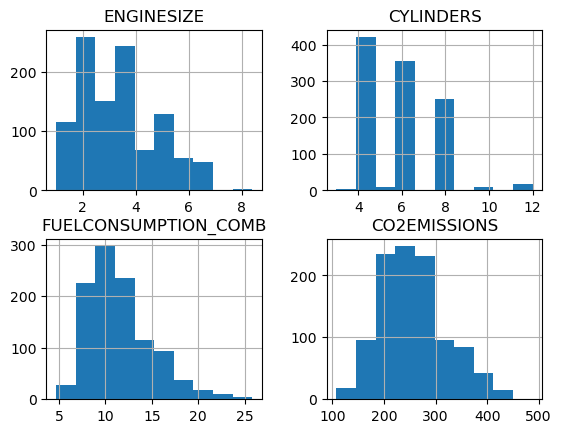

In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


FC_short = FC[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
FC_short.hist() #This is another way to create a multiview histogram may be explained in more detail in Data Visualization course
plt.show()

In [319]:
FC["CYLINDERS"].unique()

array([ 4,  6, 12,  8, 10,  3,  5])

<Axes: xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

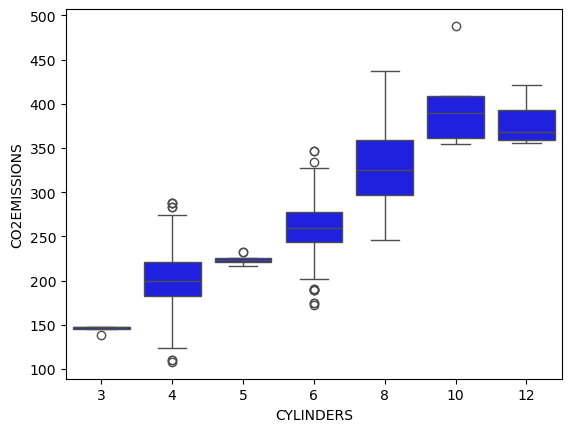

In [320]:
#plotting the relationship between engine size and CO2 emissions
import matplotlib.pyplot as pyplot
import seaborn as sns
sns.boxplot(x=FC["CYLINDERS"], y=FC["CO2EMISSIONS"], color="blue")

### Simple Linear Regression

In [322]:
#Splitting the engine size data at 80:20 ratio to test its predictability against CO2 emissions 
import pandas as pd
from sklearn.model_selection import train_test_split
x_data = FC[["CYLINDERS"]]
y_data = FC[["CO2EMISSIONS"]]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.20, random_state=0)
print(x_train.shape[0])
print(y_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

853
214
853
214


In [324]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
Coefficient = lm.coef_
Intercept = lm.intercept_
Test_score = lm.score(x_test, y_test)

print(Coefficient, Intercept, Test_score)
#Given the nature of the class of data of Cylinders as being ordinal data, running an ANOVA can be better

[[30.01473943]] [84.00737445] 0.6938815719098186


In [325]:
import statsmodels.api as sm
x = FC["CYLINDERS"]
y = FC["CO2EMISSIONS"]
z = sm.add_constant(x)

model = sm.OLS(y,x).fit()
print(model.summary())
#Through a signficant f-statistics, it can be proven that the difference in mean of each cylinder type is statistically signficant

                                 OLS Regression Results                                
Dep. Variable:           CO2EMISSIONS   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                          4.225e+04
Date:                Fri, 30 May 2025   Prob (F-statistic):                        0.00
Time:                        19:14:07   Log-Likelihood:                         -5486.9
No. Observations:                1067   AIC:                                  1.098e+04
Df Residuals:                    1066   BIC:                                  1.098e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Multiple Linear Regression Model

In [328]:
#before creating a model we ought to remove the non-numeric variables from our dataframe
import pandas as pd
FC_numeric = FC.select_dtypes(include = ["int64", "float64"])
FC_numeric.drop(columns = "MODELYEAR", inplace = True)
FC_numeric.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [329]:
FC_corr = FC_numeric.corr()
FC_corr

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [330]:
#checking the correlation specifically with CO@EMISSION (i.e., target variable)
FC_corr["CO2EMISSIONS"].sort_values()
#all variables appear to have a strong positive/negative correlation with the target value

FUELCONSUMPTION_COMB_MPG   -0.906394
CYLINDERS                   0.849685
FUELCONSUMPTION_HWY         0.861748
ENGINESIZE                  0.874154
FUELCONSUMPTION_COMB        0.892129
FUELCONSUMPTION_CITY        0.898039
CO2EMISSIONS                1.000000
Name: CO2EMISSIONS, dtype: float64

In [331]:
FC_numeric_ind = FC_numeric.drop(columns = "CO2EMISSIONS")
FC_numeric_ind.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

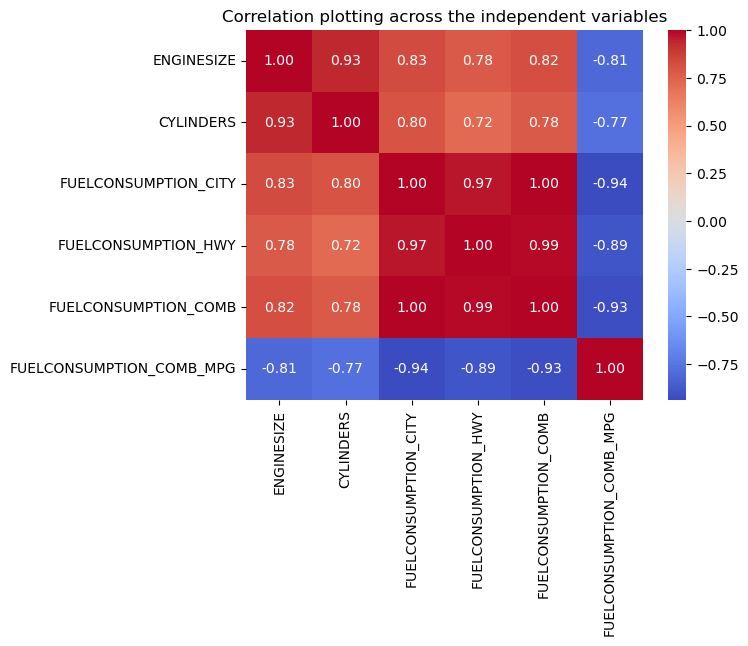

In [333]:
#heat maps can be a good way to check for multicollinearity between the independent variables
FC_corr_ind =FC_numeric_ind.corr()

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(FC_corr_ind, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation plotting across the independent variables")
plt.show
#the independent variables appear to be highly correlated

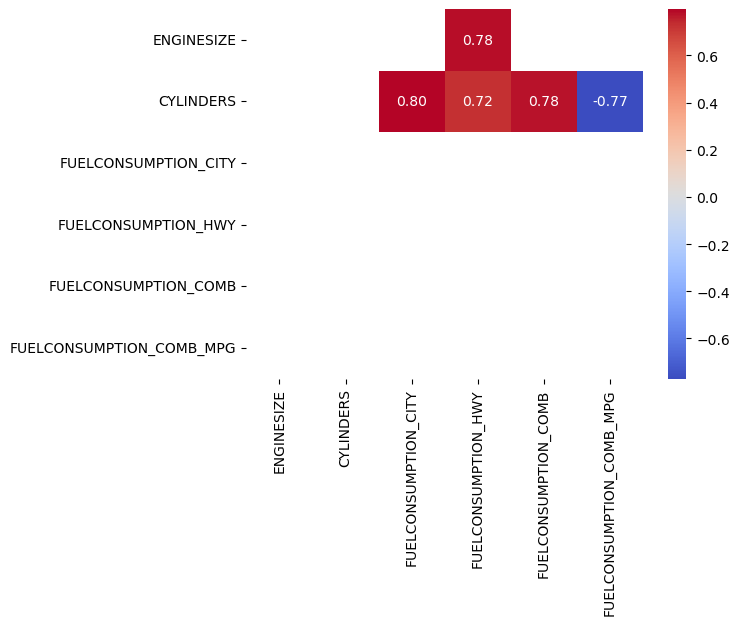

<Figure size 400x300 with 0 Axes>

In [334]:
#Filtering out correlation values that are over 0.8 and under -0.8
import numpy as np
import seaborn as sns
filterout = (FC_corr_ind >= -0.80) & (FC_corr_ind <= 0.80) #since the variables are highly correlated we shall only cut off a highly correlated variables
filterout = np.triu(filterout) #this helps to keep only the upper triangle of the correlation matrix 

sns.heatmap(FC_corr_ind, annot=True, cmap="coolwarm", fmt=".2f", mask = ~filterout) # the "~" is important to get the exact opposite of the filterout
plt.figure(figsize = (4, 3))
plt.show()
#we have decided to move with all independent variables with storng correlation with the target variable at the momemnt 

In [335]:
FC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


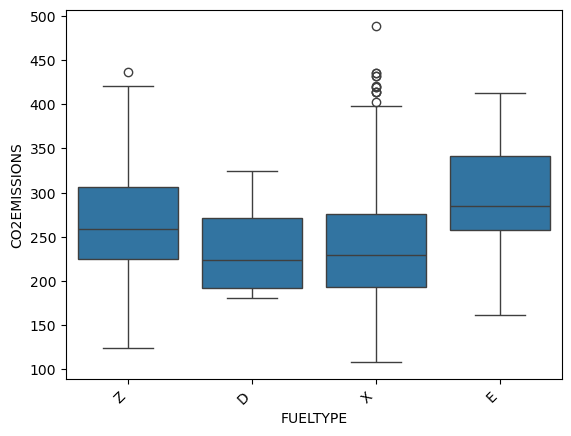

In [337]:
#Lets check if fueltype has anything to do with C02 emissions. Beginning with boxplotting
import seaborn as sns
sns.boxplot(x= FC["FUELTYPE"], y = FC["CO2EMISSIONS"])
plt.xticks(rotation=45, ha="right")
plt.show()
#no pattern is observed

In [338]:
#checking through ANOVA by the means of Mean
FC["FUELTYPE"].value_counts()

FUELTYPE
X    514
Z    434
E     92
D     27
Name: count, dtype: int64

In [345]:
#Categorizing the fueltypes based on emissions 
FC_X = FC[FC["FUELTYPE"] == "X"]
FC_Z = FC[FC["FUELTYPE"] == "Z"]
FC_E = FC[FC["FUELTYPE"] == "E"]
FC_D = FC[FC["FUELTYPE"] == "D"]

In [349]:
import scipy.stats 
scipy.stats.levene(FC_X["CO2EMISSIONS"], FC_Z["CO2EMISSIONS"], FC_E["CO2EMISSIONS"], FC_D["CO2EMISSIONS"], center = "mean")
# null hypothesis of unequal variance cannot be rejected

LeveneResult(statistic=np.float64(2.021088252763729), pvalue=np.float64(0.10925619979634896))

In [350]:
f_statistics, p_value = scipy.stats.f_oneway(FC_X["CO2EMISSIONS"], FC_Z["CO2EMISSIONS"], FC_E["CO2EMISSIONS"], FC_D["CO2EMISSIONS"]) 
round(f_statistics, 3), p_value
#the p-value is highly signficant, meaning that the difference in means of the categories have a pattern. we shall add this category into our model

(np.float64(28.335), np.float64(1.2511689298700248e-17))

In [351]:
FUELTYPE_int = pd.get_dummies(FC["FUELTYPE"], drop_first = True).astype(int) #we need to drop first variable in order to avoid multicollinearity
FC_numeric_ind = pd.concat([FC_numeric_ind, FUELTYPE_int], axis=1)
FC_numeric_ind.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,E,X,Z
0,2.0,4,9.9,6.7,8.5,33,0,0,1
1,2.4,4,11.2,7.7,9.6,29,0,0,1
2,1.5,4,6.0,5.8,5.9,48,0,0,1
3,3.5,6,12.7,9.1,11.1,25,0,0,1
4,3.5,6,12.1,8.7,10.6,27,0,0,1


In [352]:
FC_numeric_ind.rename(columns={"E": "FUELTYPE_E", 
                        "X": "FUELTYPE_X", 
                        "Z": "FUELTYPE_Z",}, inplace = True)
FC_numeric_ind.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'FUELTYPE_E', 'FUELTYPE_X', 'FUELTYPE_Z'],
      dtype='object')

In [353]:
#Lets perform the regression
x_value = FC_numeric_ind
y_value = FC[["CO2EMISSIONS"]]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_value, y_value, test_size = 0.20, random_state=0)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
print(lm.coef_)
print(lm.intercept_)
print(lm.score(x_test, y_test))
# the R-squared score is signficantly high 99.34 percent and therefore depicts the strength of the model

[[   0.43261602    1.71635222   -6.06095215   -4.56408077   28.07807604
    -1.70214876 -142.06293159  -32.94351839  -34.23376753]]
[130.51787403]
0.9934895098739643


### Logistical Regression
Logistical regression is fit for conducting regression to estimate the likelihood of occurence of a certain target variable condensed in the form of 
opposing binary result (for instance, yes/no). It helps classifying the result by forcing them in at least two classes of opposing charactersitics. Also remeber that
Logistical Regression is completely different to Logarithmic regression that is used for sigmoid pattern (i.e., "S" pattern) of relationship between data

In [355]:
#Lets begin with a Telecom based dataset that is used to tell whether the customer is likely to leave or churn the subscription in the near future
#based on certain charactersitics or independent variables. As discussed earlier, Logistical regression is perfect for generating outcomes that are
#opposing bi-variate
import pandas as pd
File = pd.read_csv("Telcom.csv")
Telcom = pd.DataFrame(File)
Telcom.drop(columns = "Unnamed: 0", inplace = True)
Telcom.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [356]:
#For this purpose, we shall only take few independent variables and the target variables of our interest
Telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [359]:
#a quick correlation to observe variables that are properly correlated with our target value
Telcom_corr = Telcom.corr() 
(Telcom_corr >= 0.65) & (Telcom_corr <= -0.65) 
#(Telcom_corr >= 0.65) & (Telcom_corr <= -0.65) #weak correlations acorss the matrix observed

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
tenure,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
age,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
address,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
income,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ed,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
employ,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
equip,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
callcard,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
wireless,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
longmon,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [360]:
Telcom_corr["churn"].sort_values()

tenure     -0.376860
employ     -0.337969
loglong    -0.336869
callcard   -0.311451
longten    -0.294906
longmon    -0.292026
age        -0.287697
address    -0.260659
cardten    -0.228634
cardmon    -0.177163
lninc      -0.117459
income     -0.090790
confer     -0.081361
logtoll    -0.070156
tollten    -0.059482
callwait   -0.052885
tollmon     0.014356
custcat     0.014839
pager       0.124623
voice       0.142315
wireless    0.174356
wiremon     0.177483
ed          0.216112
ebill       0.254838
internet    0.254838
equipmon    0.255348
equip       0.275284
churn       1.000000
Name: churn, dtype: float64

In [361]:
#The correlations are pretty weak on both ends, so lets just take tenure, age, address, income, education, and employment as our independent variable
#based on so-called expert information
Telcom_log_ind = Telcom[["tenure", "age", "address", "income", "ed", "employ", "equip"]]
Telcom_log_ind.head()

,tenure,age,address,income,ed,employ,equip
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0


In [362]:
#The norm is to standardize the data before taking them forward for regression
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

Telcom_log_ind_N = Scaler.fit_transform(Telcom_log_ind)
Telcom_log_ind_N[0:3]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695]])

In [363]:
#Splitting the data create the test model
x = Telcom_log_ind_N
y = Telcom["churn"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)
print(x_train.shape[0], x_test.shape[0], y_train.shape[0], y_test.shape[0])

140 60 140 60


### <font color = "red"> Warning!!! </font>

A bad practice that can essentially lead to Data Leakage or snooping is observed in the above two cells. WE SHOULD NEVER PREPROCES THE DATA BEFORE SPLITTING THEM, OR ELSE WE RISK DATA SNOOPING OR LEAKAGE  

In [370]:
#Now, its time for logistical regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train) #So x_train (which is in numpy array format) and y_train (which is in series format) seem to fit for regression too
y_test_hat = lr.predict(x_test)
print(lr.coef_)
print(y_test_hat[0:7]) #Predictions that the customers are going to churn out or not. 1 for yes, 0 for no

[[-0.50642837 -0.43138822  0.16435036 -0.00490406  0.32101518 -0.52714828
   0.49740547]]
[0. 0. 0. 0. 0. 0. 0.]


In [371]:
#lets see the probability that actually led to such machine learning decision
y_test_hat_prob = lr.predict_proba(x_test)
y_test_hat_prob [0:10] #note that the probability threshold of 0.5 is used

array([[0.59043484, 0.40956516],
       [0.56181642, 0.43818358],
       [0.52888758, 0.47111242],
       [0.97574503, 0.02425497],
       [0.89656149, 0.10343851],
       [0.93734215, 0.06265785],
       [0.98107558, 0.01892442],
       [0.63846513, 0.36153487],
       [0.97361379, 0.02638621],
       [0.45433941, 0.54566059]])

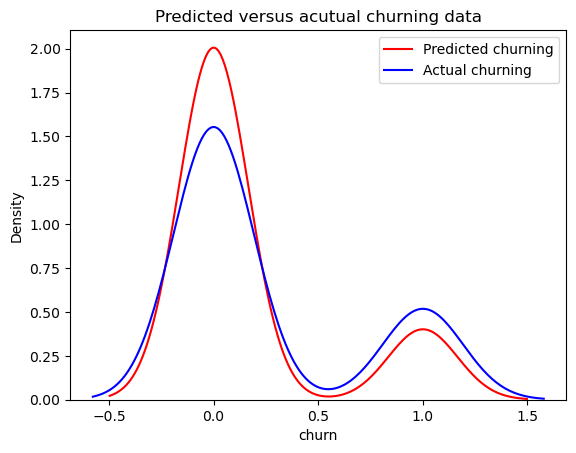

In [373]:
 #Visually testing the predictability of the churn prediction
import seaborn as sns
sns.kdeplot(x=y_test_hat, color='red', label="Predicted churning")
sns.kdeplot(x=y_test, color='blue', label = "Actual churning")
plt.title("Predicted versus acutual churning data")
plt.legend()
#except for few overestimations in the non-churning class [0.0] obcviously leading to underestimation in the churning class [1.0], the mnodel appears quite predictive 

In [374]:
#The predictability of the model can also be evaluated statistically through the log loss function
from sklearn.metrics import log_loss
log_loss(y_test, y_test_hat_prob) #it is pretty much like Rsquared scoring, except that it is not ranged between 0 to 1, and smaller the better. Hence, the effectiveness of 
                                  #the model can only be tested by comparing the log_los score with another model. 

#Also, note that it doesn't use the predicted test values to calculate the score but instead the probability allocations that led to such predictions. It is because
#log_loss has to penalize false classification that are backedup by more confident probability value (i.e., misclassification with probability of 0.85 will be penalized
#more with higher log loss in comparision to misclassification with probability of 0.65)

0.44708531496581994

### Multiclass Classifcation
In here we shall predict classes within multivariate class variables

In [376]:
import pandas as pd
File = pd.read_csv("biometric.csv")
Biometric = pd.DataFrame(File)
Biometric.head()

,Unnamed: 0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [377]:
#Lets train the model to predict a new patient biometric into one of those categories
Biometric["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

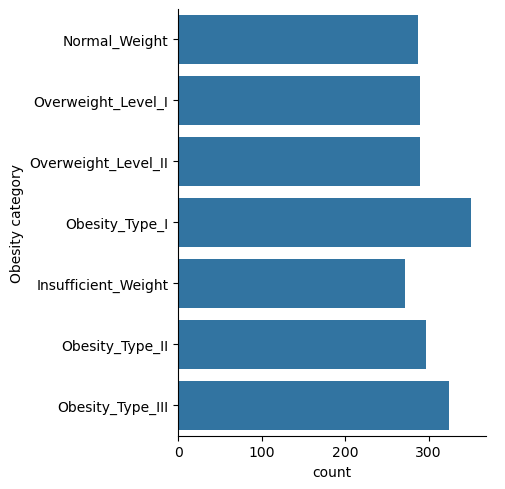

In [378]:
#The idea is to check if the count distribution of each category variable is evenly distributed to rule out unbalancement
import seaborn as sns
sns.catplot(y = Biometric["NObeyesdad"], kind = "count") #we will put our variable in the y-axis for better visuals
plt.ylabel("Obesity category")
plt.show()
#the variables appear to have even distribution, which is good

In [386]:
Biometric.drop(columns = "Unnamed: 0", inplace=True)
Biometric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [387]:
#At first, we need to scale all the continuous data and merge it into the original dataframe
Biometric_numeric = Biometric.select_dtypes(include = ["float64", "int64"])
Biometric_numeric.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [388]:
Columns1 = Biometric_numeric.columns
Columns1 #we will need to add this columns later for the standardized versions

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [389]:
#Standardizing the data for better machine training
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Biometric_numeric_std = Scaler.fit_transform(Biometric_numeric)
Biometric_numeric_std = pd.DataFrame(Biometric_numeric_std)
Biometric_numeric_std.columns = Columns1 #we need to add column names because there are no columns for dataframes that are being genderated from arrays
Biometric_numeric_std.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625


### <font color = "red"> Warning!!! </font>

A bad practice that can essentially lead to Data Leakage or snooping is observed in the above cell. WE SHOULD NEVER PREPROCES THE DATA BEFORE SPLITTING THEM, OR ELSE WE RISK DATA SNOOPING OR LEAKAGE  

In [391]:
Biometric_scaled = pd.concat([Biometric.drop(columns = Biometric_numeric), Biometric_numeric_std], axis=1)
Biometric_scaled.head()
#Ok, we have sucesfully replaced the original values of the continuous dtype into standardized ones

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625


In [392]:
#Now, before we convert the categories into indicators we ought to split the target value because we do not want onehotencoding in it
Biometric_scaled_ind = Biometric_scaled.drop(columns = "NObeyesdad", axis=1)
Biometric_scaled_ind.columns #we shall perform cat.codes method on it because the data is ranked or ordinal

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'Age', 'Height', 'Weight', 'FCVC', 'NCP',
       'CH2O', 'FAF', 'TUE'],
      dtype='object')

In [393]:
#Now, we should convert the category/object type data into indicators to enable machine learning
Biometric_categorical_ind = Biometric_scaled_ind.select_dtypes(include = ["object"]).columns.tolist()
Biometric_categorical_ind #For some reason we are only adapting the columns of the categorical features

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [396]:
#Now transforming the categorical data into indicators through one hot encoding method and not cat.codes method because the categories are nominal (i.e., unordered) and 
#independent variables
from sklearn.preprocessing import OneHotEncoder #this is more like a pipeline to automate get_dummies into multiple columns at once as the name suggests
encoder = OneHotEncoder(sparse_output = False, drop = "first", handle_unknown = "ignore") #this will drop first column of every indicated categorical columns
encoded = encoder.fit_transform(Biometric_scaled_ind[Biometric_categorical_ind]) #it is interesting that you can acess the column values through list of column names only
                                                                                 #Unfortunately, if we do not follow this process of working with column names only we shall 
                                                                                 #run into problem of not being able to caption the transformed categorical variables correctly
encoded_ind_df = pd.DataFrame(encoded, columns = encoder.get_feature_names_out(Biometric_categorical_ind)) #get_feature_names_out is a specific code for OneHotEncoder to name
                                                                                                           #the columns
encoded_ind_df.head()

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### <font color = "red"> Warning!!! </font>

A bad practice that can essentially lead to Data Leakage or snooping is observed in the above cell. WE SHOULD NEVER PREPROCES THE DATA BEFORE SPLITTING THEM, OR ELSE WE RISK DATA SNOOPING OR LEAKAGE  

In [398]:
Biometric["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [399]:
#Now. replacing the categorical data with the encoded categorical data
Biometric_scaled_encoded_ind = pd.concat([Biometric_scaled_ind.drop(columns = Biometric_categorical_ind), encoded_ind_df], axis=1)
Biometric_scaled_encoded_ind.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [400]:
#Now developing the ordered indicator version of the target variable within the original dataframe. Variable were ordered on personal discretion
#while OneHotEncoder is used for independent variables, cat.code and LabelEncoder() is used for ordered ordinal data that are dependent variables 
Order = pd.CategoricalDtype(categories = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], ordered=True)
Biometric['NObeyesdad_indic'] = Biometric['NObeyesdad'].astype(Order).cat.codes #it appears LabelEncoder() of sklearn is much robust encoding function for machine learning purpose  
Biometric['NObeyesdad_indic'].head()

0    1
1    1
2    1
3    2
4    3
Name: NObeyesdad_indic, dtype: int8

### <font color = "red"> Warning!!! </font>

A bad practice that can essentially lead to Data Leakage or snooping is observed in the above cell. WE SHOULD NEVER PREPROCES THE DATA BEFORE SPLITTING THEM, OR ELSE WE RISK DATA SNOOPING OR LEAKAGE  

In [404]:
#Time for model training and prediction
x_data = Biometric_scaled_encoded_ind
y_data = Biometric['NObeyesdad_indic']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.40, random_state = 0) 
print(x_train.shape[0], x_test.shape[0], y_train.shape[0], y_test.shape[0])

1266 845 1266 845


#### Performing One-versus-All Regression

In [409]:
from sklearn.linear_model import LogisticRegression
lr_1vA = LogisticRegression(multi_class="ovr", max_iter=1000)
lr_1vA.fit(x_train, y_train)

D:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [410]:
y_test_hat = lr_1vA.predict(x_test)
y_test_hat[0:9]

array([5, 4, 4, 6, 6, 5, 0, 6, 4], dtype=int8)

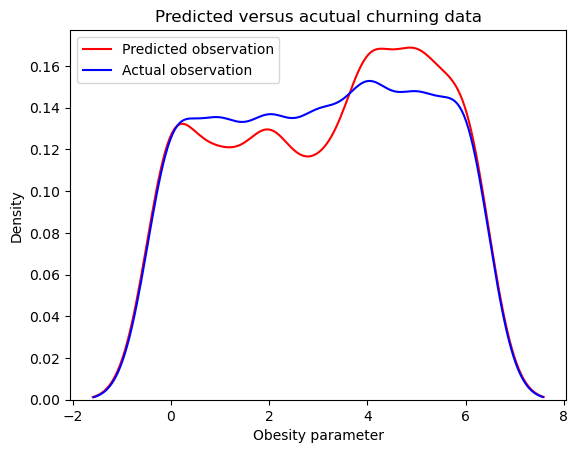

In [411]:
#Now testing the accuracy of the model through visual inspection
import seaborn as sns
sns.kdeplot(x=y_test_hat, color='red', label="Predicted observation")
sns.kdeplot(x=y_test, color='blue', label = "Actual observation")
plt.title("Predicted versus acutual churning data")
plt.xlabel("Obesity parameter") 
plt.legend()
plt.show()
#the visual test gives an inaccurate prediction

In [412]:
#performing statistical accuracy test
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_hat)
#78 percent accuracy of the model is observed. The accuracy is tested between 0 to 1 much like R2score for classification prediction

0.7846153846153846

### Performing One-versus-One Regression

In [415]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

lr_1v1 = OneVsOneClassifier(LogisticRegression(max_iter=1000))
lr_1v1.fit(x_train, y_train)
y_test_hat = lr_1v1.predict(x_test)
y_test_hat[0:9]                  

array([5, 4, 2, 6, 6, 5, 0, 6, 4], dtype=int8)

In [416]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_hat)
#The accuracy score appears to have improved drastically

0.9325443786982248

### Decisions trees
#### Can performed in non-parametric datasets
While Two-class or Multiclass classification helps in "identifying" the class in where a particular instance can be classified into based on a set of variables with 
different coefficient strengths, Decision tree, helps in "deciding" in which class can a particular instance can be classified into also based on a set of 
variables that proceeded in each step with the objective to reduce entropy and increase information gain. 

In [418]:
import pandas as pd
File = pd.read_csv("Drug.csv")
Drug = pd.DataFrame(File)
Drug.drop(columns = "Unnamed: 0", inplace=True)

In [419]:
#In this df we are expected to decide on drug prescription for new patients based on their medical profile
Drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [420]:
Drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [427]:
#Lets convert the independent variables into numeric through labelencoding function of sci-kit learn
from sklearn.preprocessing import LabelEncoder #although label encoder that assume order (i.e., ordinality) is not suggested for regressor variables 
                                               #it is excepted for decision tree analysis that does not involve regression. Otherwise, OneHotEncoding is suggested
label_encoder = LabelEncoder()
Drug["Sex"] = label_encoder.fit_transform(Drug["Sex"])
Drug["BP"] = label_encoder.fit_transform(Drug["BP"])
Drug["Cholesterol"] = label_encoder.fit_transform(Drug["Cholesterol"])
Drug.head()
#please note that the orders are kept arbitrary

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


### <font color = "red"> Warning!!! </font>

A bad practice that can essentially lead to Data Leakage or snooping is observed in the above cell. WE SHOULD NEVER PREPROCESS THE DATA BEFORE SPLITTING THEM, OR ELSE WE RISK DATA SNOOPING OR LEAKAGE  

In [433]:
x_value = Drug.drop(columns = "Drug", axis=1)
y_value = Drug["Drug"]

In [434]:
#Now splitting the data into training and testing variables for predictive analysis
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_value, y_value, test_size = 0.30, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) 

(140, 5) (60, 5) (140,) (60,)


In [435]:
#now conducting the decision tree analysis
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 4) #max_depth is more like how many branches of the tree (i.e., branch order) shall be created for the analysis.
                                                                  # it is a hyperparameter alike to alpha for Ridge Regression being conducted on polynomial model
dt.fit(x_train, y_train) #note how the function allows purely nominal value (i.e., y_train) for analysis 
y_test_hat = dt.predict(x_test)
y_test_hat[0:9]

array(['drugC', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX',
       'drugX', 'drugY'], dtype=object)

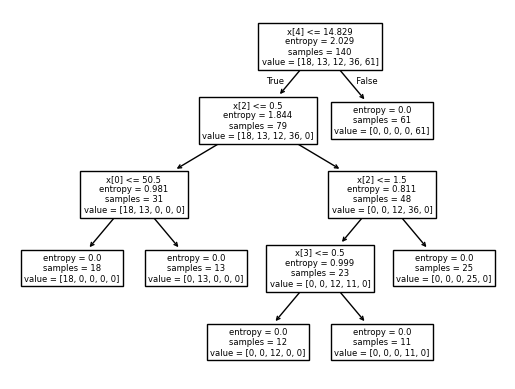

In [436]:
#plotting the decisiontree
import matplotlib.pyplot as plt
plot_tree(dt) #this module is imported from sklearn.tree from above cell
plt.show()

In [437]:
#visual testing of the model effectiveness is not possible because the dependent variables are all categorical. So, statistical testing is proceeded
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_hat)
#thats a perfect 100 percent score, 

1.0

### Regression Trees
While Decision Trees are good for deciding the target of an instance within a set of nominal classification variables, regression trees are good for deciding the 
target of an instance within a set of ordinal continuous variable alike to non-decision type regression. Personally, i find the regression tree to have been always made
redundant by the usual regression analysis

In [439]:
import pandas as pd
File = pd.read_csv("taxitip.csv")
Taxitip = pd.DataFrame(File)
Taxitip.drop(columns = "Unnamed: 0", axis=1, inplace=True)
Taxitip.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00


In [440]:
Taxitip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41202 entries, 0 to 41201
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               41202 non-null  int64  
 1   passenger_count        41202 non-null  int64  
 2   trip_distance          41202 non-null  float64
 3   RatecodeID             41202 non-null  int64  
 4   store_and_fwd_flag     41202 non-null  int64  
 5   PULocationID           41202 non-null  int64  
 6   DOLocationID           41202 non-null  int64  
 7   payment_type           41202 non-null  int64  
 8   fare_amount            41202 non-null  float64
 9   mta_tax                41202 non-null  float64
 10  tolls_amount           41202 non-null  float64
 11  improvement_surcharge  41202 non-null  int64  
 12  tip_amount             41202 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 4.1 MB


In [441]:
#Before we begin our analysis, lets standardize our independent variables
Taxitip_ind = Taxitip.drop(columns = "tip_amount", axis=1)
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler() #Lets use the Min-max normalization method of standardization this type as we can pretend that we want all of our values strictly within a range
                        #while z-score standardization method usually lay value within -3 to 3, breaches at both sides are still permitted
Taxitip_ind_scaled = MinMax.fit_transform(Taxitip_ind)
Taxitip_ind_scaled[0:4]

array([[0.        , 0.        , 0.09283345, 0.25      , 1.        ,
        0.48031496, 0.61450382, 0.        , 0.33826531, 1.        ,
        0.12175439, 1.        ],
       [0.        , 0.        , 0.10278553, 0.25      , 1.        ,
        0.48031496, 0.88931298, 0.        , 0.33826531, 1.        ,
        0.12175439, 1.        ],
       [0.        , 0.        , 0.09378126, 0.25      , 1.        ,
        0.48031496, 0.17175573, 0.        , 0.33826531, 1.        ,
        0.12175439, 1.        ],
       [0.        , 0.14285714, 0.10162709, 0.25      , 1.        ,
        0.48031496, 0.55343511, 0.        , 0.33826531, 1.        ,
        0.        , 1.        ]])

In [442]:
#Now lets split our data into train and test variable
y_value = Taxitip["tip_amount"]
x_value = Taxitip_ind_scaled

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_value, y_value, test_size = 0.3, random_state = 0)
print(x_train.shape[0], x_test.shape[0], y_train.shape[0], y_test.shape[0])

28841 12361 28841 12361


In [446]:
#Now, proceeding with the Regression Tree
from sklearn.tree import DecisionTreeRegressor
rt = DecisionTreeRegressor(criterion = "squared_error", max_depth = 4)
rt.fit(x_train, y_train)
y_test_hat = rt.predict(x_test)
y_test_hat[0:9]

array([14.36672688, 14.36672688, 14.36672688, 14.36672688, 14.36672688,
       14.36672688, 14.36672688, 14.36672688, 14.36672688])

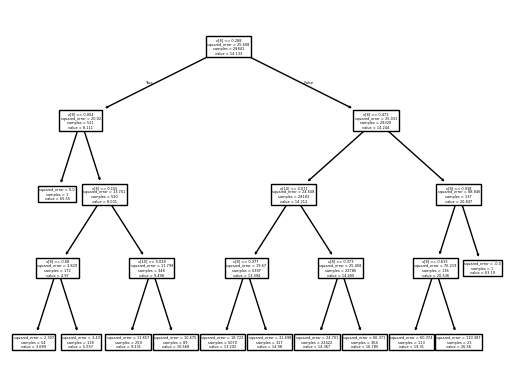

In [449]:
#plotting the regression tree
import matplotlib.pyplot as plt
plot_tree(rt) #this module is imported from sklearn.tree from above cell
plt.show()

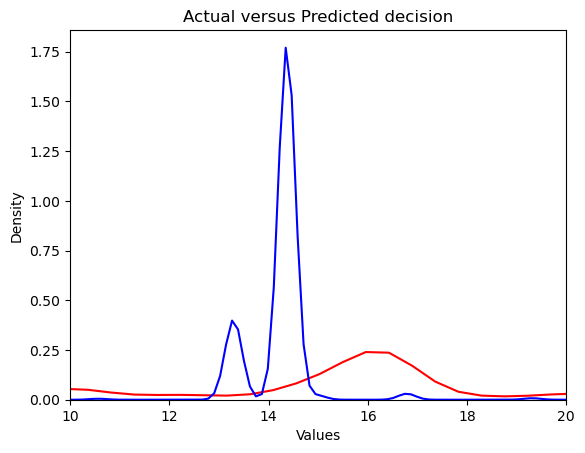

In [450]:
#Visually test the effectiveness of the model
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(x = y_test, label = "actual decision", color = "red")
sns.kdeplot(x = y_test_hat, label = "predicted decision", color = "blue")
plt.title("Actual versus Predicted decision")
plt.xlabel("Values")
plt.xlim(10,20)
plt.show() #Visually the prediction appears to be poor

In [451]:
#Statistically testing the robustness of the decision model
rt.score(x_test, y_test)
print(f"the r_squared score is {rt.score(x_test, y_test)*100} percentage only")
#Statistically the prediction appears poor. May be if we had deployed Manhattan standardization method, the result could be different

the r_squared score is 4.541776591624314 percentage only


### Support Vector Machine (SVM)
#### Can be perfomed on non-parametric datasets
SVMs work by finding the optimal hyperplane that best separates different classes in the feature space. The "optimal" hyperplane is the one that has the largest margin (distance) to the nearest training data points of any class, which are called "support vectors." 

A digrammatical description of Support Vector Machine
<left>
    <img src="SVM.webp" width="500" alt="Support
        Vector Machine">
</left>

In [454]:
File = pd.read_csv("creditfraud.csv")
Creditfraud = pd.DataFrame(File)
Creditfraud.shape

(284807, 32)

In [455]:
Creditfraud.info() #very rich and well cleaned data. All frature names are encrypted for security reasons

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  284807 non-null  int64  
 1   Time        284807 non-null  float64
 2   V1          284807 non-null  float64
 3   V2          284807 non-null  float64
 4   V3          284807 non-null  float64
 5   V4          284807 non-null  float64
 6   V5          284807 non-null  float64
 7   V6          284807 non-null  float64
 8   V7          284807 non-null  float64
 9   V8          284807 non-null  float64
 10  V9          284807 non-null  float64
 11  V10         284807 non-null  float64
 12  V11         284807 non-null  float64
 13  V12         284807 non-null  float64
 14  V13         284807 non-null  float64
 15  V14         284807 non-null  float64
 16  V15         284807 non-null  float64
 17  V16         284807 non-null  float64
 18  V17         284807 non-null  float64
 19  V1

In [458]:
Creditfraud.drop(columns = ["Unnamed: 0", "Time"], inplace = True)

In [459]:
Creditfraud["Class"].value_counts()
#It appears the decisions in this dataset is very biased towards 0 (i.e., the non-fradulent activity), and therefore it requires us to be careful to 
#ensure that the dataset is split properly to ensure diversity of the records

Class
0    284315
1       492
Name: count, dtype: int64

In [463]:
#It pays to measure the correlation of the wide variety of the regressor variables with our decision feature (i.e., Class). However, a full blown
#correlation matrix can become very apprehensive in our case, therefore a specific correlation and its visualization shall be rendered
Credit_corr = Creditfraud.corr()
Credit_corr_Classonly = Credit_corr["Class"].drop("Class")
Credit_corr_Classonly

V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

<Axes: >

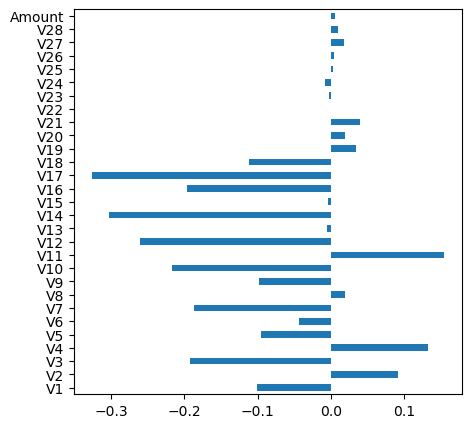

In [465]:
import matplotlib.pyplot as plt
Credit_corr_Classonly.plot(kind = "barh", figsize = (5, 5))

In [466]:
#Breaking the dataframe into regressors and regressand
Creditfraud_ind = Creditfraud.drop("Class", axis=1)
Creditfraud_ind.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [467]:
#standardizing and normalizing the independent variables for further analysis
from sklearn.preprocessing import StandardScaler, normalize

Scaler = StandardScaler()
Creditfraud_ind_scaled = Scaler.fit_transform(Creditfraud_ind)
Creditfraud_ind_scaled_converged = normalize(Creditfraud_ind_scaled, norm="l1") #we need further allow l1 type normalization in SVM to allow convergence of the variables

#Preparing training and testing variables
x_value = Creditfraud_ind_scaled_converged
y_value = Creditfraud["Class"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_value, y_value, test_size = 0.30, random_state = 0, stratify = y_value) 
#stratify function is passed to make sure that the categories in the y_data are stratified in such a way that the all categorical are represented in both test and train sets,
#since we our categorical values of the target variable is evenly distributed, stratification was unnecessary)
print(x_train.shape[0], x_test.shape[0], y_train.shape[0], y_test.shape[0])

199364 85443 199364 85443


### <font color = "red"> Warning!!! </font>

A bad practice that can essentially lead to Data Leakage or snooping is observed in the above cell. WE SHOULD NEVER PREPROCES THE DATA BEFORE SPLITTING THEM, OR ELSE WE RISK DATA SNOOPING OR LEAKAGE  

In [469]:
#Now performing the analysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_sample_weight

dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(x_train, y_train, compute_sample_weight("balanced", y_train)) #the compute_sample_weight is a function that further allows higher weight to 
                                                                                              #minority sample data compared to majority sample data. It could be necessary 
                                                                                              #in our case represents fradulent activity (i.e., anamoly) that needs stronger
                                                                                              #attention in our purpose because lower sample data
y_test_hat = dt.predict(x_test)
y_test_hat[0:9]

array([0, 0, 0, 0, 0, 1, 0, 0, 0])

In [470]:
#observing the probability scoring behind the prediction
y_test_hat_proba = dt.predict_proba(x_test)
y_test_hat_proba[0:9]

array([[0.90103346, 0.09896654],
       [0.96036144, 0.03963856],
       [0.96036144, 0.03963856],
       [0.96036144, 0.03963856],
       [0.96036144, 0.03963856],
       [0.1909965 , 0.8090035 ],
       [0.96036144, 0.03963856],
       [0.96036144, 0.03963856],
       [0.96036144, 0.03963856]])

In [471]:
#Receiver Operating Characteristic Curve (ROC-AUC) score is a good metric to evaluate model performance. It evaluates model's ability to distinguish positive and negative 
#classes considering all possible probability thresholds. The higher its value, the better the model is considered for separating the two classes of values.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_hat_proba[:, 1:2]) #we use the probability value that is specifically assigned to the fradulent credit behavior to test the ability the model
                                                #to predict fradulent credit behavior

np.float64(0.9411440105326031)

In [472]:
#Only now are we performing the classification analysis through the SVM method
from sklearn.svm import LinearSVC
svm = LinearSVC(class_weight = "balanced", loss="hinge") #the class_weight function remedies imbalancement in the function
                                                         #The "hinge" loss is the standard loss function for traditional Support Vector Machines. 
                                                         #It encourages a wide margin between classes and penalizes misclassifications when the predicted value falls
                                                         #on the wrong side of the margin.
svm.fit(x_train, y_train)
y_test_hat = svm.decision_function(x_test)
y_test_hat[0:9] 

D:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([-1.25362759, -3.23615542, -1.92063371, -2.34125398, -0.8865119 ,
        0.04501957, -1.82943916, -1.50689271, -1.54576866])

In [473]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_hat) #performing the metrics test when using the SVM method, not much difference in the performance of the model is obtained

np.float64(0.9847423805774237)

### K-Nearest Neighbors (KNN)
#### Can be performed on non-parametric datasets
K-Nearest Neighbors (KNN) is a fundamental, non-parametric, supervised machine learning algorithm used for both classification and regression tasks. The core idea behind
KNN is similar things are near to each other. Although all classification technique is built on the same assumption, KNN may not use a hyperplane to seperate data into
classes. Also, the "K" in KNN refers to the number of neighbors that a particular classificaiton with incorporate. As such, higher the k value, the more likely is the model likely to underfit and vice-versa 

The idea of K-Nearest Neighbors
<left>
    <img src="KNN.png" width="600">
</left>

In [476]:
import pandas as pd
File = pd.read_csv("Telcom_Cat.csv")
Telcom_Cat = pd.DataFrame(File)
Telcom_Cat.drop(columns = "Unnamed: 0", axis=1, inplace=True)
Telcom_Cat.head()
#In this dataframe custcat is our target variable

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [482]:
Telcom_Cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [483]:
import matplotlib.pyplot as plt
Telcom_Cat_corr = Telcom_Cat.corr()
Telcom_Cat_corr_custcat = Telcom_Cat_corr["custcat"].drop("custcat")
Telcom_Cat_corr_custcat.sort_values()
#the correlation in general is low in both end, however, tenure, income, education, and employment have correlation above 0.1, but we shall still use all variables

region    -0.023771
gender    -0.004966
retire     0.008908
age        0.056909
address    0.067913
reside     0.082022
marital    0.083836
employ     0.110011
income     0.134525
tenure     0.166691
ed         0.193864
Name: custcat, dtype: float64

In [484]:
#Now breaking the data into independent and dependent variable
Telcom_Cat_ind = Telcom_Cat.drop(columns = "custcat", axis=1)   

In [485]:
#Preprocessing the data for further machine learning and analysis. Standardizing and normalizing is very important in the context of KNN because it needs calculated the
#euclidean distance between the points
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Telcom_Cat_ind_scaled = Scaler.fit_transform(Telcom_Cat_ind) #Using general z-score standardization for this purpose

#Now splitting the standardized data for model training and testing
x_value = Telcom_Cat_ind_scaled 
y_value = Telcom_Cat["custcat"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_value, y_value, test_size = 0.3, random_state = 0)
print(x_train.shape[0], x_test.shape[0], y_train.shape[0], y_test.shape[0])

700 300 700 300


### <font color = "red"> Warning!!! </font>

A bad practice that can essentially lead to Data Leakage or snooping is observed in the above cell. WE SHOULD NEVER PREPROCES THE DATA BEFORE SPLITTING THEM, OR ELSE WE RISK DATA SNOOPING OR LEAKAGE  

[0.27, 0.293, 0.32, 0.337, 0.337, 0.34, 0.36, 0.36, 0.337, 0.363, 0.363]


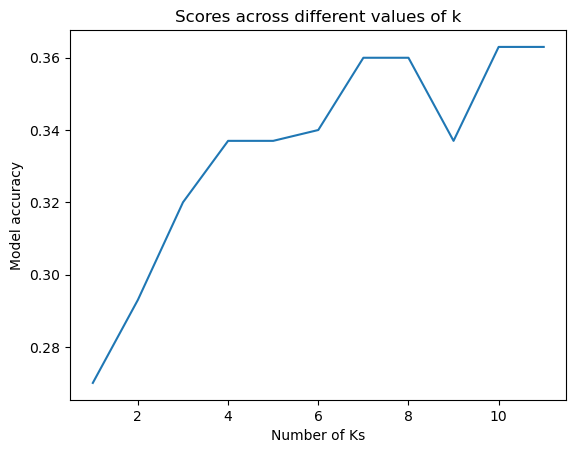

In [489]:
#Beginning the model training process through KNN by deploying a range of k value. 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k = np.arange(1, 12, 1)
scores = []
for neighbors in k: # k is the hyperparameter in KNN that adjusts the number of nearest data points that the algorithm considers when making a prediction for an data
    KNN = KNeighborsClassifier(n_neighbors=neighbors) 
    knn_model = KNN.fit(x_train, y_train)
    y_test_hat = knn_model.predict(x_test)
    comb = round(accuracy_score(y_test_hat, y_test), 3)
    scores.append(comb)
print(scores)
plt.plot(k, scores) #turns out you need to perform with plt function for variables that are not dataframes 
plt.title("Scores across different values of k")
plt.xlabel("Number of Ks")
plt.ylabel("Model accuracy")
plt.show()

In [490]:
for i, values in enumerate(scores):
    print (i+1, values)
#THE model with K-value of 10th and 11th order appear most robust 

1 0.27
2 0.293
3 0.32
4 0.337
5 0.337
6 0.34
7 0.36
8 0.36
9 0.337
10 0.363
11 0.363


#### Conducting Confusion matrix and F1 score evaluations on the K-value that obtained the highest accuracy score (i.e., 10th order)
Accuracy score, Confusion matrix, and F1 score evaluation metrics usually follow the evaluation pipeline for classification-based regression such as DecisionTree classifier, KNN, SVM, and Logistical Regressions that evaluates the performance of the prediction through accuracy score. While a confusion matrix allows visual observation of confusions and non-confusions regarding the assignment of records into classification, F1 scores combine precision and recall evaluation metrics to generate metric score.   

In [494]:
y_test.value_counts()
#so we shall be obtaining the evaluation metrices for each classification out of the four classification we have in our categorical target variable

custcat
1    95
3    81
2    63
4    61
Name: count, dtype: int64

In [496]:
#At first, we need to obtain the classification report to generate the confusion matrix
from sklearn.metrics import classification_report
KNN = KNeighborsClassifier(n_neighbors=10) 
knn_model = KNN.fit(x_train, y_train)
y_test_hat = knn_model.predict(x_test)

print(classification_report(y_test_hat, y_test))
#As we can see here, four batch of scores are obtained for four different classifications in our target variable. It is important that F1-score ranges between 0 to 1, much 
#like the R2 squared score. 

              precision    recall  f1-score   support

           1       0.48      0.51      0.50        90
           2       0.25      0.24      0.24        68
           3       0.35      0.36      0.35        78
           4       0.31      0.30      0.30        64

    accuracy                           0.36       300
   macro avg       0.35      0.35      0.35       300
weighted avg       0.36      0.36      0.36       300



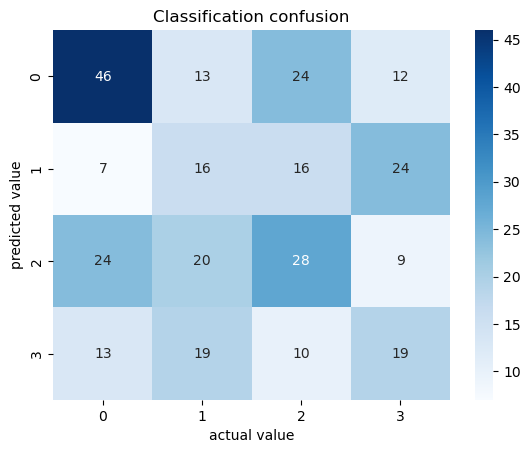

In [497]:
#Now plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrx = confusion_matrix(y_test, y_test_hat)
sns.heatmap(conf_matrx, annot = True, cmap = "Blues")
plt.title("Classification confusion")
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.show()

#As we can see, severe misclassification seems to have occurred, especially regarding the classification of customers in the 2nd and 4th categories, misclassification is higher
#than the correct classification. 

## Ensemble Models

### Random Forest
#### Bagging Method (Reducing Overfitting (i.e., variance) without increasing biasness)
Random forest is a commonly-used machine learning algorithm that combines the output of multiple decision trees to reach a single result. When multiple decision trees form an ensemble in the random forest algorithm, they predict more accurate results, particularly when the individual trees are uncorrelated with each other. Random Forest as an ensemble learning methods are made up of a set of classifiers—e.g. decision trees—and their predictions are aggregated to identify the most popular result. It utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees. It generates a random subset of features, which ensures low correlation among decision trees. While decision trees consider all the possible feature splits, random forests only select a subset of those features.

Random forest algorithms have three main hyperparameters, which need to be set before training. These include node size, the number of trees, and the number of features sampled. From there, the random forest classifier can be used to solve for regression or classification problems. The random forest algorithm is made up of a collection of decision trees, and each tree in the ensemble is comprised of a data sample drawn from a training set with replacement, called the bootstrap sample. Of that training sample, one-third of it is set aside as test data, known as the out-of-bag (oob) sample. Another instance of randomness is then injected through feature bagging, adding more diversity to the dataset and reducing the correlation among decision trees. For a regression task, the individual decision trees will be averaged, and for a classification task, a majority vote—i.e. the most frequent categorical variable—will yield the predicted class. Finally, the oob sample is then used for cross-validation, finalizing that prediction.

#### Visual reference of process involved in Random Forest that involves sample bootstrapping and feature sampling
<left>
    <img src="Random Forest.JPG" width="400">
</left>


In [533]:
#We shall again the use the taxitip dataset for our purpose
File = pd.read_csv("Taxitip.csv")
Taxitip_RF = pd.DataFrame(File)
Taxitip_RF.drop(columns = "Unnamed: 0", axis=1, inplace = True)
Taxitip_RF.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00


In [537]:
#Now breaking the data for further preprocessing
Taxitip_RF_ind = Taxitip_RF.drop(columns = "tip_amount")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Taxitip_RF_ind_std = scaler.fit_transform(Taxitip_RF_ind) #standardizing is not necessary for ensemble models
#Now splitting the transform independent data into training and testing data
x_value = Taxitip_RF_ind_std
y_value = Taxitip_RF["tip_amount"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_value, y_value, test_size = 0.2, random_state=0)
print(x_train.shape[0], x_test.shape[0], y_train.shape[0], y_test.shape[0])

32961 8241 32961 8241


### <font color = "red"> Warning!!! </font>

A bad practice that can essentially lead to Data Leakage or snooping is observed in the above cell. WE SHOULD NEVER PREPROCES THE DATA BEFORE SPLITTING THEM, OR ELSE WE RISK DATA SNOOPING OR LEAKAGE  

In [540]:
#As we can see below, we have 13 features in our dataset. So, the rule of thumb in deciding on the number of feature to be dedicated for decision tree analysis for 
#each tree is dividing the number of feature by 13. So we shall dedicate (n/3) number of feature for each tree in the forest as base estimator
maxfeatures = int(Taxitip_RF.shape[1]/3)
#so we can use 4 features each for each tree of our random forest

In [542]:
#Likewise for base_estimator or number of trees we shall use a range of multiple of 10 to 150 based on our discretion, We shall use the estimator that generates the 
#highest R_squared score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

Estimated = []
trees = np.arange(10, 150, 10)
for numbers in trees:
    rf = RandomForestRegressor(n_estimators = numbers, max_features = maxfeatures, max_depth = None, random_state = 0) 
    #we shall set the max_depth to max because overfitting is not a problem with random forest due to random features adjustment per tree 
    # we shall reinstate the random_state value becuase the randomization process of feature selection and bagging happens here
    rf.fit(x_train, y_train)
    Scores = rf.score(x_test, y_test)
    Estimated.append(Scores)
print(Estimated)

[-0.2673712727815034, -0.2400934539922288, -0.23336473818510295, -0.23141762186332837, -0.22768084977837355, -0.22557840292615894, -0.22106379773330276, -0.21988808662303083, -0.22025186027878552, -0.219725757843926, -0.21878250238275276, -0.21802351845556278, -0.21623267950551495, -0.21621686065653378]


In [543]:
import matplotlib.pyplot as plt
for i, scores in enumerate(Estimated):
    print((i+1)*10, scores)
#as we can see the r2 score below 0 tends to a poor model performance, and therefore the model with least worst performance is one with 140 trees in the forest
#the prediction of with 140 base etimations can be compared with actual value through visual screening. 

10 -0.2673712727815034
20 -0.2400934539922288
30 -0.23336473818510295
40 -0.23141762186332837
50 -0.22768084977837355
60 -0.22557840292615894
70 -0.22106379773330276
80 -0.21988808662303083
90 -0.22025186027878552
100 -0.219725757843926
110 -0.21878250238275276
120 -0.21802351845556278
130 -0.21623267950551495
140 -0.21621686065653378


Text(0.5, 1.0, 'errors in the prediction')

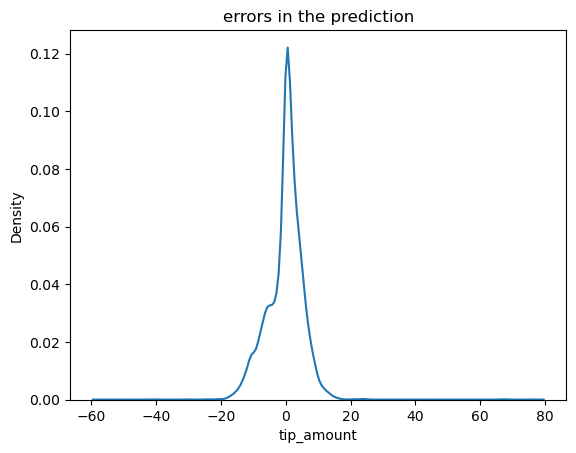

In [544]:
#Lets plot the residual error in a histogram of the model with the least number of trees
rf = RandomForestRegressor(n_estimators = 140, max_features = maxfeatures, max_depth = None, random_state = 0) 
rf.fit(x_train, y_train)
y_test_hat = rf.predict(x_test)

residuals = y_test - y_test_hat
import seaborn as sns
sns.kdeplot(residuals) 
plt.title("errors in the prediction")
# The error in the data seems to have centralized and spiked in the specific area where the residue is the least or even zero. So, obviously, most of our error are caused to 
#errors of small magnitudes that is between over and underexpecting $20 as tip amount. However, the frequency or density of no error is the deepest as the residue of zero value
#appear to be most prevalent. Visually, this actually proves that the data has been predicting well. 

### Extreme Gradient Boost (Reducing underfitting (i.e., biasness) without increase variance)
Unlike Random Forests, XGBOOST is a ensemble method that adopts the boosting method compared to bagging method, such that the final decisions of the 
parallely constructed trees are not averaged (for continuous variable) or voted (for categorical variable) as in the bagging method. Instead, trees are constructed 
sequentially by allowing suceedining tree learn from the errors (residuals) of the preceeding tree. In other words, it iteratively refines the model by focusing on the examples that were misclassified or poorly predicted by the earlier trees. This sequential nature means the training of one tree depends on the previous ones.

Also, while Random forest ensemble allows individual trees to retain maximum depth. the trees in boosting method is rather shallow ("weak learners"), because they are part of an additive process where many small improvements add up. Hence, we can stick to four levels of branches per tree. However, the number of trees to construct the forest can be applied with the same rule of thumb 

In [3]:
#Processing the same dataset for this XGBoosting too
import numpy as np
from xgboost import XGBRegressor #note that XGBOOST does not come from the Sci-kit package
from sklearn.metrics import r2_score

Estimated1 = []
trees = np.arange(10, 150, 10)
for numbers in trees:
    xgb = XGBRegressor(n_estimators = numbers, learning_rate = 0.1, max_depth = 4, random_state = 0) #learning_rate substitutes feature numbers here because the idea is to
                                                                                                     #tackle underfitting through boosted learning. In here, we shall deploy
                                                                                                     #learning rate of 0.1 only
    xgb.fit(x_train, y_train)
    Scores1 = rf.score(x_test, y_test)
    Estimated1.append(Scores)
print(Estimated1)
#it's interesting that models perform with same effectiveness when tested on rsquared. Interestingly, it is the highest R2 score for our earlier random forest model 

NameError: name 'x_train' is not defined

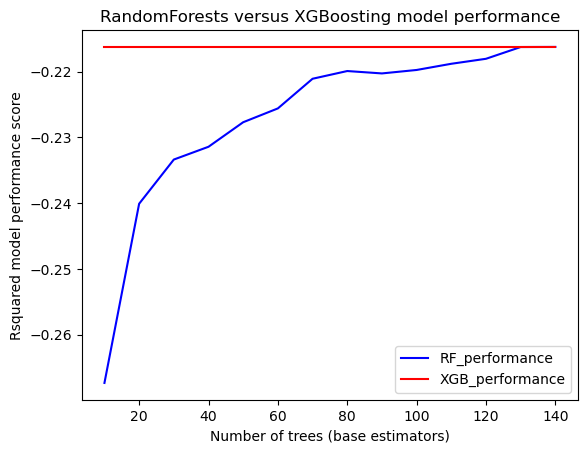

In [547]:
#Comparing the scores between the two ensemble models through graph
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x = trees, y = Estimated, color = "blue", label = "RF_performance")
sns.lineplot(x = trees, y = Estimated1, color = "red", label = "XGB_performance")
plt.title("RandomForests versus XGBoosting model performance")
plt.xlabel("Number of trees (base estimators)")
plt.ylabel("Rsquared model performance score")
plt.show()

### GridsearchCV and Pipelines
A combination of GridsearchCV and Pipelines greatly increases the efficiency of the codes as it helps automating the search for the best parameters and hyperparameters without applying the "for loop" function and consolidating multiple preprocessing steps into a single pipeine. 

#### Case I: Not optimizing for best paramter or hyperparamter

In [550]:
#In here we shall deploy GridSearchCV and Pipelines for classification job using the popular IRIS botanical dataset
import pandas as pd
File = pd.read_csv("Iris.csv")
IRIS = pd.DataFrame(File)
IRIS.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [551]:
#wrangling the dataframe for our purpose
#IRIS.drop(columns = "Id", axis=1, inplace=True)
IRIS_ind = IRIS.drop(columns = "Species")
IRIS_ind.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [552]:
#Splitting our data for predictive analysis
x_value = IRIS_ind
y_value = IRIS["Species"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_value, y_value, test_size = 0.30, random_state = 0, stratify = y_value)
print(x_train.shape[0])
print(x_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])
#since we are not evaluating the model for optimization through the administration of multiple parameters or hyperparameters, we shall not create an evaluation batch

105
45
105
45


In [553]:
#creating a pipeline that shall perform Standardization, Principal Component Analysis, and K-Nearest Neighbor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components = 2)), ("knn", KNeighborsClassifier(n_neighbors = 5))]) 

pipeline.fit(x_train, y_train) 
print(pipeline.score(x_test, y_test)) #although accuracy_score is used for classification evaluation pipeline only taks .score as the evaluation method
print(f"the pipelined model is able to explain {round(pipeline.score(x_test, y_test)*100, 2)} percent of the variance in the original dataset")

1.0
the pipelined model is able to explain 100.0 percent of the variance in the original dataset


In [554]:
y_test_hat = pipeline.predict(x_test)
print(y_test_hat[0:10])

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor']


In [555]:
#Apart from providing an efficient means of coding, pipeline also allows independent model evaluation for processes that are stacked together. although it takes an extra prompt
piped_pca = pipeline.named_steps["pca"]
print(piped_pca.explained_variance_ratio_)
print(piped_pca.components_) 

[0.74901783 0.18926101]
[[ 0.48570296  0.44875031 -0.22145055  0.51003232  0.50353001]
 [-0.02243506  0.39060743  0.91849209  0.02593553  0.05120686]]


In [556]:
#Now pursuing the classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_test_hat, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



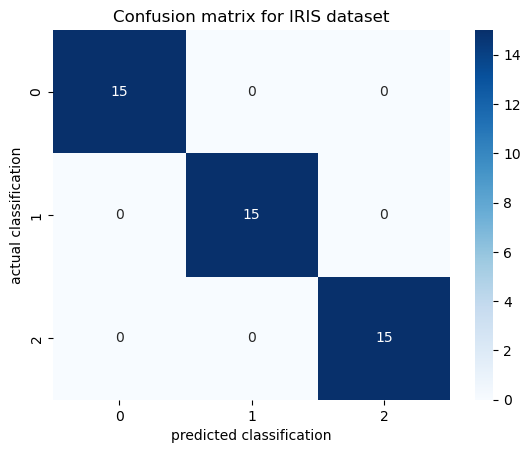

In [557]:
#Now, generating the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrx = confusion_matrix(y_test_hat, y_test)
sns.heatmap(conf_matrx, annot = True, cmap = "Blues")
plt.title("Confusion matrix for IRIS dataset")
plt.xlabel("predicted classification")
plt.ylabel("actual classification")
plt.show()
# the accuracy of the prediction is notable

#### Case II: Optimizing for parameter and hyperparameter

In [559]:
# so at first we need to set the range of hyper parameters we are interested in
import numpy as np

param_grid = {"pca__n_components": [2, 3], 
        "knn__n_neighbors": np.arange(1, 5, 1)} #using dictionary in a algorithm after a long while. The double underscore or "dunder" is a special syntax in sklearn
                                                 #to identify the hyperparameter in a pipeline
from sklearn.model_selection import StratifiedKFold
#since we shall be using the Cross-validation method to split the score it needs to be directed accoridingly. and we shall use stratified kfolds particularly because 
#stratification is essential for classification 
CV = StratifiedKFold(n_splits = 4) #so we have decided to create four different splits 

#now deploying gridsearch
from sklearn.model_selection import GridSearchCV
Grid = GridSearchCV(pipeline, param_grid, cv=CV)
Grid.fit(x_train, y_train) #we use the same training variables from Case I

Best_estimator = Grid.best_estimator_
print(Best_estimator)
print(" PCA with most explained variance = 3 | Number of k-neighborhood per classification = 4")

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=3)),
                ('knn', KNeighborsClassifier(n_neighbors=np.int64(3)))])
 PCA with most explained variance = 3 | Number of k-neighborhood per classification = 4


In [560]:
print(f"the performance of the model appear to have improved from {round(pipeline.score(x_test, y_test)*100, 2)} percent to {round(Grid.score(x_test, y_test),2)*100} percent")

the performance of the model appear to have improved from 100.0 percent to 100.0 percent


In [561]:
y_test_hat_grid = Grid.predict(x_test)
y_test_hat_grid[0:9]

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [562]:
#Now evaluating the performance model with classification report confusion matrix
from sklearn.metrics import classification_report
print(classification_report(y_test_hat_grid, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



### Precision and Recall - Two important metrices for evaluation of classification model
Precision answers "Of all the instances the model predicted as positive, how many were actually positive?".  It focuses on the quality of the positive predictions. A high precision means a low rate of false alarms or False Positive (i.e., when the model predicts something is positive, it's very likely correct).

Precision= True Positives (TP) / (True Positives (TP) + False Positives (FP)) 

Precision is calculated when the cost of false positive is high. Such as flagging genuine emails as spam. Because, we want the True Positives to be accurate with least number of records classified as False Positive (FP)

Recall answers "Of all the instances that the model predicted as positive, did it capture all the positive?". It focues on the quantity or completeness of the positive predictions. A high recall means a low rate of unsounded alarms or false negatives (i.e., when the model predicts something is positive, it hasn't missed out records that are positive). 

Recall= True Positive (TP) /(True Positives (TP) + False Negatives (FP)) 

Recall is calculated when the cost of false negative or missing out of true positive is high. Such as not detecting credit card fradulent activities when the Bank really does not care as much about raising false alarm than not raising true alarm. So, it is when the bank is okay in becoming trigger happy in flagging transactions than being conservative. 

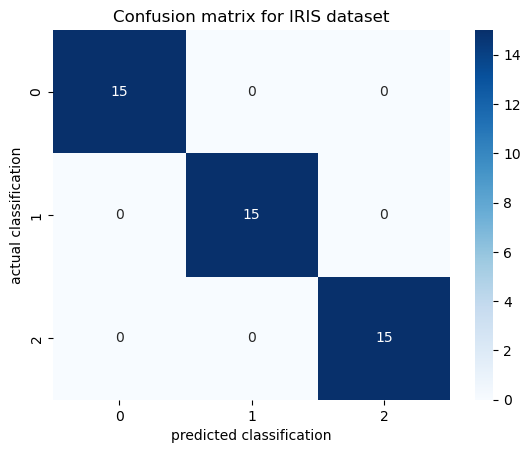

In [563]:
#Now, generating the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrx = confusion_matrix(y_test_hat_grid, y_test)
sns.heatmap(conf_matrx, annot = True, cmap = "Blues")
plt.title("Confusion matrix for IRIS dataset")
plt.xlabel("predicted classification")
plt.ylabel("actual classification")
plt.show()
#Earlier the model was slightly confused about the second species, this time its spot-on